<a href="https://colab.research.google.com/github/Ujjwalb2/investx/blob/main/lstm_prediction_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29413 sha256=9401be5a3023c9b3b200f6e8aefcc4c41f97708be65393dbee61468908df3fdc
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime

from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard

%matplotlib inline
import yfinance as yf

In [45]:
stock_symbol = 'TSLA' #Samsung
start_date = '2015-01-01'
end_date = '2024-01-01'

stock_data = yf.download(stock_symbol, start = start_date, end=end_date,interval='1d')

print(stock_data.head())
stock_data.to_csv('stock_data.csv')

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2015-01-02  14.858000  14.883333  14.217333  14.620667  14.620667  71466000
2015-01-05  14.303333  14.433333  13.810667  14.006000  14.006000  80527500
2015-01-06  14.004000  14.280000  13.614000  14.085333  14.085333  93928500
2015-01-07  14.223333  14.318667  13.985333  14.063333  14.063333  44526000
2015-01-08  14.187333  14.253333  14.000667  14.041333  14.041333  51637500


In [46]:
stocks = pd.read_csv('stock_data.csv')
stocks['Date'] = pd.to_datetime(stocks['Date'])

In [47]:
import ta

In [48]:
stocks['EMA_9'] = ta.trend.ema_indicator(stocks['Close'], window=9)
stocks['EMA_20'] = ta.trend.ema_indicator(stocks['Close'], window=20)
stocks['EMA_55'] = ta.trend.ema_indicator(stocks['Close'], window=55)
stocks['EMA_144'] = ta.trend.ema_indicator(stocks['Close'], window=144)
stocks['RSI'] = ta.momentum.rsi(stocks['Close'], window=14)

In [49]:
stocks

,Date,Open,High,Low,Close,Adj Close,Volume,EMA_9,EMA_20,EMA_55,EMA_144,RSI
0,2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500,NaN,NaN,NaN,NaN,NaN
2,2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500,NaN,NaN,NaN,NaN,NaN
3,2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000,NaN,NaN,NaN,NaN,NaN
4,2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2259,2023-12-22,256.760010,258.220001,251.369995,252.539993,252.539993,93249800,249.833696,244.955352,240.198506,235.556603,58.137456
2260,2023-12-26,254.490005,257.970001,252.910004,256.609985,256.609985,86892400,251.188954,246.065317,240.784630,235.846994,60.824035
2261,2023-12-27,258.350006,263.339996,257.519989,261.440002,261.440002,106494400,253.239163,247.529573,241.522322,236.200001,63.793639
2262,2023-12-28,263.660004,265.130005,252.710007,253.179993,253.179993,113619900,253.227329,248.067708,241.938667,236.434208,55.978815


In [50]:
stocks.dropna(inplace=True)

In [51]:
stocks= stocks.reset_index(drop=True)


In [52]:
stocks

,Date,Open,High,Low,Close,Adj Close,Volume,EMA_9,EMA_20,EMA_55,EMA_144,RSI
0,2015-07-29,17.618000,17.859333,17.466667,17.587999,17.587999,41851500,17.644538,17.651400,17.037315,15.838507,50.176253
1,2015-07-30,17.512667,17.796000,17.474001,17.785999,17.785999,30519000,17.672830,17.664219,17.064054,15.865369,52.278000
2,2015-07-31,17.840000,17.957333,17.674667,17.743334,17.743334,33339000,17.686931,17.671754,17.088314,15.891272,51.771209
3,2015-08-03,17.752666,17.780666,17.138000,17.332666,17.332666,38302500,17.616078,17.639460,17.097040,15.911153,47.043928
4,2015-08-04,17.334000,17.781334,17.222668,17.752001,17.752001,35287500,17.643263,17.650178,17.120432,15.936544,51.876065
...,...,...,...,...,...,...,...,...,...,...,...,...
2116,2023-12-22,256.760010,258.220001,251.369995,252.539993,252.539993,93249800,249.833696,244.955352,240.198506,235.556603,58.137456
2117,2023-12-26,254.490005,257.970001,252.910004,256.609985,256.609985,86892400,251.188954,246.065317,240.784630,235.846994,60.824035
2118,2023-12-27,258.350006,263.339996,257.519989,261.440002,261.440002,106494400,253.239163,247.529573,241.522322,236.200001,63.793639
2119,2023-12-28,263.660004,265.130005,252.710007,253.179993,253.179993,113619900,253.227329,248.067708,241.938667,236.434208,55.978815


In [53]:
datelist_train = list(stocks['Date'])
stocks = stocks.drop('Date', axis=1)


In [54]:
cols = list(stocks)[1:12]

In [55]:
dataset_train=stocks

In [56]:



print('Training set shape == {}'.format(dataset_train.shape))
print('All timestamps == {}'.format(len(datelist_train)))
print('Featured selected: {}'.format(cols))

Training set shape == (2121, 11)
All timestamps == 2121
Featured selected: ['High', 'Low', 'Close', 'Adj Close', 'Volume', 'EMA_9', 'EMA_20', 'EMA_55', 'EMA_144', 'RSI']


In [57]:
cols

['High',
 'Low',
 'Close',
 'Adj Close',
 'Volume',
 'EMA_9',
 'EMA_20',
 'EMA_55',
 'EMA_144',
 'RSI']

In [58]:

# Using multiple features (predictors)

training_set = dataset_train.to_numpy()
print('Shape of training set == {}.'.format(training_set.shape))
training_set

Shape of training set == (2121, 11).


array([[ 17.61800003,  17.85933304,  17.46666718, ...,  17.03731481,
         15.83850686,  50.17625291],
       [ 17.5126667 ,  17.79599953,  17.47400093, ...,  17.06405354,
         15.86536883,  52.27799976],
       [ 17.84000015,  17.95733261,  17.67466736, ...,  17.08831355,
         15.89127179,  51.77120914],
       ...,
       [258.3500061 , 263.33999634, 257.51998901, ..., 241.52232202,
        236.20000113,  63.79363925],
       [263.66000366, 265.13000488, 252.71000671, ..., 241.9386674 ,
        236.43420791,  55.97881536],
       [255.1000061 , 255.19000244, 247.42999268, ..., 242.17228627,
        236.6003567 ,  52.07011772]])

In [92]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)

sc_predict = StandardScaler()
sc_predict.fit_transform(training_set[:, 0:1])

array([[-0.81269079],
       [-0.81362922],
       [-0.81071296],
       ...,
       [ 1.3320246 ],
       [ 1.37933212],
       [ 1.30306989]])

In [93]:
training_set_scaled

array([[-0.81269079, -0.81389628, -0.81085194, ..., -0.81231123,
        -0.80886215, -0.17967832],
       [-0.81362922, -0.81444822, -0.81078496, ..., -0.81206692,
        -0.8086081 , -0.0236146 ],
       [-0.81071296, -0.81304223, -0.80895198, ..., -0.81184525,
        -0.80836312, -0.06124598],
       ...,
       [ 1.3320246 ,  1.3254305 ,  1.38189504, ...,  1.23883751,
         1.27524549,  0.83147105],
       [ 1.37933212,  1.34103015,  1.33795866, ...,  1.24264171,
         1.27746054,  0.25118684],
       [ 1.30306989,  1.25440453,  1.28972882, ...,  1.24477632,
         1.27903192, -0.03905073]])

In [94]:
# Creating a data structure with 90 timestamps and 1 output
X_train = []
y_train = []

n_future = 60   # Number of days we want top predict into the future
n_past = 90     # Number of past days we want to use to predict the future

for i in range(n_past, len(training_set_scaled) - n_future +1):
    X_train.append(training_set_scaled[i - n_past:i, 0:dataset_train.shape[1] - 1])
    y_train.append(training_set_scaled[i + n_future - 1:i + n_future, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

X_train shape == (1972, 90, 10).
y_train shape == (1972, 1).


In [95]:
# Import Libraries and packages from Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam

In [96]:
# Initializing the Neural Network based on LSTM
model = Sequential()

# Adding 1st LSTM layer
model.add(LSTM(units=64, return_sequences=True, input_shape=(n_past, dataset_train.shape[1]-1)))

# Adding 2nd LSTM layer
model.add(LSTM(units=10, return_sequences=False))

# Adding Dropout
model.add(Dropout(0.25))

# Output layer
model.add(Dense(units=1, activation='linear'))

# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error')

In [97]:
%%time
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')

history = model.fit(X_train, y_train, shuffle=True, epochs=30, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1,batch_size=256)

Epoch 1/30
7/7 [==============================] - ETA: 0s - loss: 0.2962
Epoch 1: val_loss improved from inf to 0.22571, saving model to weights.h5
7/7 [==============================] - 7s 363ms/step - loss: 0.2962 - val_loss: 0.2257 - lr: 0.0100
Epoch 2/30
7/7 [==============================] - ETA: 0s - loss: 0.1286
Epoch 2: val_loss did not improve from 0.22571
7/7 [==============================] - 1s 200ms/step - loss: 0.1286 - val_loss: 0.2424 - lr: 0.0100
Epoch 3/30
7/7 [==============================] - ETA: 0s - loss: 0.1061
Epoch 3: val_loss did not improve from 0.22571
7/7 [==============================] - 1s 199ms/step - loss: 0.1061 - val_loss: 0.2919 - lr: 0.0100
Epoch 4/30
7/7 [==============================] - ETA: 0s - loss: 0.0924
Epoch 4: val_loss did not improve from 0.22571
7/7 [==============================] - 1s 199ms/step - loss: 0.0924 - val_loss: 0.3469 - lr: 0.0100
Epoch 5/30
7/7 [==============================] - ETA: 0s - loss: 0.1198
Epoch 5: val_loss d

In [98]:
# Generate list of sequence of days for predictions
datelist_future = pd.date_range(datelist_train[-1], periods=n_future, freq='1d').tolist()

'''
Remeber, we have datelist_train from begining.
'''

# Convert Pandas Timestamp to Datetime object (for transformation) --> FUTURE
datelist_future_ = []
for this_timestamp in datelist_future:
    datelist_future_.append(this_timestamp.date())

In [99]:
# Perform predictions
predictions_future = model.predict(X_train[-n_future:])

predictions_train = model.predict(X_train[n_past:])

59/59 [==============================] - 1s 24ms/step


In [100]:
# Inverse the predictions to original measurements

# ---> Special function: convert <datetime.date> to <Timestamp>
def datetime_to_timestamp(x):
    '''
        x : a given datetime value (datetime.date)
    '''
    return datetime.strptime(x.strftime('%Y%m%d'), '%Y%m%d')


y_pred_future = sc_predict.inverse_transform(predictions_future)
y_pred_train = sc_predict.inverse_transform(predictions_train)

PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Open']).set_index(pd.Series(datelist_future))
PREDICTION_TRAIN = pd.DataFrame(y_pred_train, columns=['Open']).set_index(pd.Series(datelist_train[2 * n_past + n_future -1:]))

# Convert <datetime.date> to <Timestamp> for PREDCITION_TRAIN
PREDICTION_TRAIN.index = PREDICTION_TRAIN.index.to_series().apply(datetime_to_timestamp)


In [101]:
PREDICTIONS_FUTURE

,Open
2023-12-29,216.755569
2023-12-30,215.468887
2023-12-31,214.345810
2024-01-01,213.311005
2024-01-02,214.073776
2024-01-03,212.427109
2024-01-04,208.792023
2024-01-05,207.660004
2024-01-06,208.393127
2024-01-07,210.204498


In [102]:
dataset_train

,Open,High,Low,Close,Adj Close,Volume,EMA_9,EMA_20,EMA_55,EMA_144,RSI
0,17.618000,17.859333,17.466667,17.587999,17.587999,41851500,17.644538,17.651400,17.037315,15.838507,50.176253
1,17.512667,17.796000,17.474001,17.785999,17.785999,30519000,17.672830,17.664219,17.064054,15.865369,52.278000
2,17.840000,17.957333,17.674667,17.743334,17.743334,33339000,17.686931,17.671754,17.088314,15.891272,51.771209
3,17.752666,17.780666,17.138000,17.332666,17.332666,38302500,17.616078,17.639460,17.097040,15.911153,47.043928
4,17.334000,17.781334,17.222668,17.752001,17.752001,35287500,17.643263,17.650178,17.120432,15.936544,51.876065
...,...,...,...,...,...,...,...,...,...,...,...
2116,256.760010,258.220001,251.369995,252.539993,252.539993,93249800,249.833696,244.955352,240.198506,235.556603,58.137456
2117,254.490005,257.970001,252.910004,256.609985,256.609985,86892400,251.188954,246.065317,240.784630,235.846994,60.824035
2118,258.350006,263.339996,257.519989,261.440002,261.440002,106494400,253.239163,247.529573,241.522322,236.200001,63.793639
2119,263.660004,265.130005,252.710007,253.179993,253.179993,113619900,253.227329,248.067708,241.938667,236.434208,55.978815


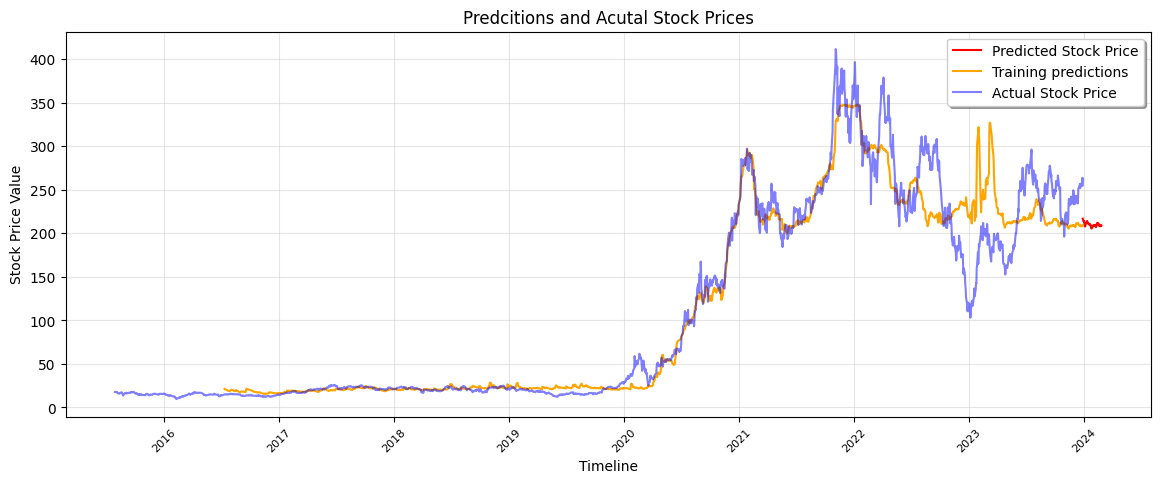

In [103]:
# Set plot size
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5

# Plot parameters
START_DATE_FOR_PLOTTING = '2012-06-01'

plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Open'], color='r', label='Predicted Stock Price')
plt.plot(PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:].index, PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:]['Open'], color='orange', label='Training predictions')
# plt.plot(dataset_train.loc[START_DATE_FOR_PLOTTING:].index, dataset_train.loc[START_DATE_FOR_PLOTTING:]['Open'], color='b', label='Actual Stock Price')
plt.plot(datelist_train, stocks['Open'], label = 'Actual Stock Price', c = 'blue', alpha=0.5)
# plt.axvline(x = min(PREDICTIONS_FUTURE.index), color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title('Predcitions and Acutal Stock Prices', family='Arial', fontsize=12)
plt.xlabel('Timeline', family='Arial', fontsize=10)
plt.ylabel('Stock Price Value', family='Arial', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()